In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

See the `scripts/sankey_data.py` to get the data tfr this notebook.

In [8]:
data = {
    "default": np.array([1734, 1022, 1021, 1021, 966, 955, 908]),
    "journalistic": np.array([ 1414884,    1358024,    1332755,    1332669,    1329801,    1283131,    1251430]),
    "literature": np.array([22258, 15566, 15564, 15564, 15535, 12301, 12101]),
    "web": np.array([49758, 40982, 22153, 13394, 11015, 9884, 9102]),
    "politics": np.array([ 1771, 1046, 994, 829, 797, 784, 488]),
    "legal": np.array([461784, 392211, 352481, 352457, 352456, 331859, 284367]),
    "social_media": np.array([2014752, 260315, 253176, 253175, 232417, 218466, 208218]),
}

In [9]:
steps = ("Raw", "JustText", "Duplicates", "Max tokens", "Invalid Chars", "Patterns", "MISC")
y_pos = np.arange(len(steps))


In [10]:
values = []
for i in range(len(steps)):
    values.append(sum(v[i] for v in data.values()))

In [11]:
max_value = max(values)
min_value = min(values)

['0', '1', '2', '3', '4', '5']


/var/folders/jk/45gcpgpj4t971sqz0vt881l40000gn/T/ipykernel_92168/181399080.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels([x.get_text() for x in xticks])


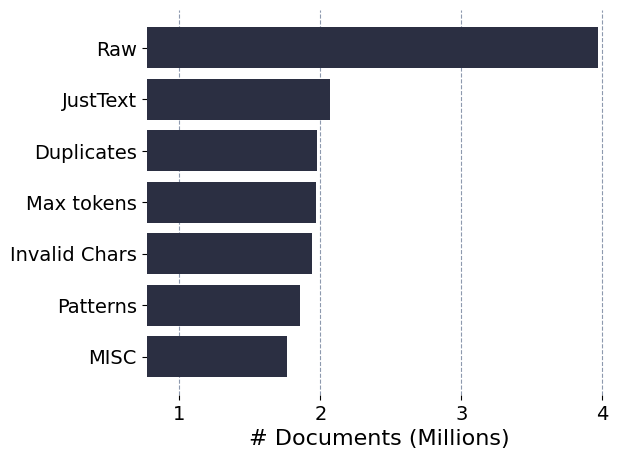

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))

# Define font sizes
SIZE_DEFAULT = 24
SIZE_LARGE = 28
# plt.rc("font", family="Roboto")  # controls default font
# plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels


ax.barh(y_pos, values, align="center", color="#2B2F42")

ax.set_yticks(y_pos, labels=steps)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xlabel("# Documents (Millions)")
ax.set_xlim(min_value - 1000000, max_value + 100000)
xticks = ax.get_xticklabels()
print([x.get_text() for x in xticks])
ax.xaxis.set_ticklabels([x.get_text() for x in xticks])
plt.grid(axis="x", linestyle="--", color="#8D99AE", )
ax.set_axisbelow(True)

# Hide the all but the bottom spines (axis lines)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

plt.savefig("filter_pipeline.eps", dpi=300, bbox_inches='tight')
plt.show()